In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
df_crypto = pd.read_csv("Crypto_currency.csv")

In [3]:
df_crypto.shape

(3337, 11)

In [4]:
df_crypto.columns

Index(['Date', 'BTC_usd', 'BTC_Volume', 'Gold_usd', 'Litecoin_usd', 'NYSE_usd',
       'Ethereum_Price', 'nasdaq_composite_index', 'Bitcoin_pop_score',
       'Difficulty_BTC', 'BTC_cash_usd'],
      dtype='object')

In [5]:
df_crypto['Gold_usd'] = df_crypto['Gold_usd'].ffill()
df_crypto['NYSE_usd'] = df_crypto['NYSE_usd'].ffill()
df_crypto['nasdaq_composite_index'] = df_crypto['nasdaq_composite_index'].ffill()
df_crypto['Bitcoin_pop_score'] = df_crypto['Bitcoin_pop_score'].ffill()
df_crypto['Ethereum_Price'] = df_crypto['Ethereum_Price'].fillna(0)
df_crypto['BTC_cash_usd'] = df_crypto['BTC_cash_usd'].fillna(0)

In [6]:
df_crypto.isnull().sum()

Date                      0
BTC_usd                   0
BTC_Volume                0
Gold_usd                  1
Litecoin_usd              1
NYSE_usd                  1
Ethereum_Price            0
nasdaq_composite_index    1
Bitcoin_pop_score         3
Difficulty_BTC            4
BTC_cash_usd              0
dtype: int64

In [7]:
df_crypto = df_crypto.dropna().reset_index(drop=True)

In [8]:
df_crypto.describe()

,BTC_usd,BTC_Volume,Gold_usd,Litecoin_usd,NYSE_usd,Ethereum_Price,nasdaq_composite_index,Bitcoin_pop_score,Difficulty_BTC,BTC_cash_usd
count,3330.000000,3.330000e+03,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3330.000000
mean,15440.880567,1.722062e+10,16.868141,70.601058,13210.711544,884.065461,9118.797467,42.579880,1.572868e+13,293.349932
std,16477.630224,1.909005e+10,4.789199,63.555790,2178.108823,1084.789466,3498.852519,23.533447,1.798376e+13,401.081692
min,176.897003,1.060090e+07,6.080000,1.153240,9014.580078,0.000000,4218.810059,5.000000,4.064096e+10,0.000000
25%,1230.045044,4.167645e+08,13.370000,10.320875,11281.697270,49.925000,5905.629883,23.000000,5.210000e+11,0.000000
50%,8791.714843,1.313232e+10,16.719999,58.914732,12789.089845,297.220000,8016.114990,43.000000,9.060000e+12,214.040627
75%,26329.265628,2.751208e+10,19.487500,93.873547,15313.387450,1634.610016,12246.830080,59.000000,2.310000e+13,379.010345
max,67549.734380,3.510000e+11,31.200001,387.869171,17353.759770,4810.071289,16120.919920,100.000000,7.760000e+13,3909.000000


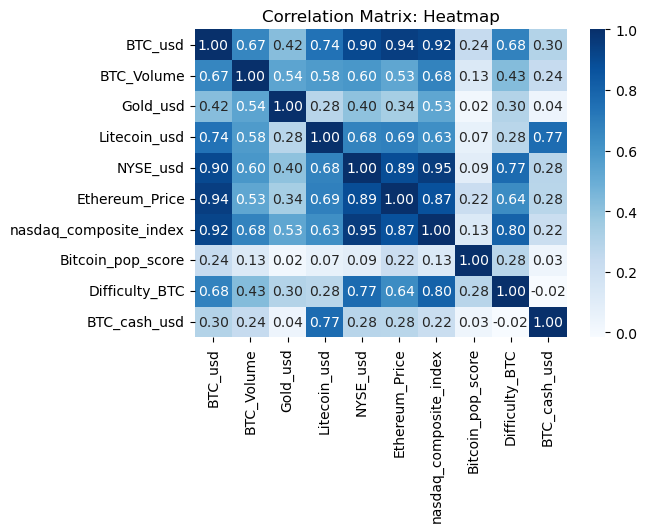

In [9]:
df_class_num = df_crypto.drop(['Date'], axis=1)
correlation_matrix = df_class_num.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix: Heatmap')
plt.show()

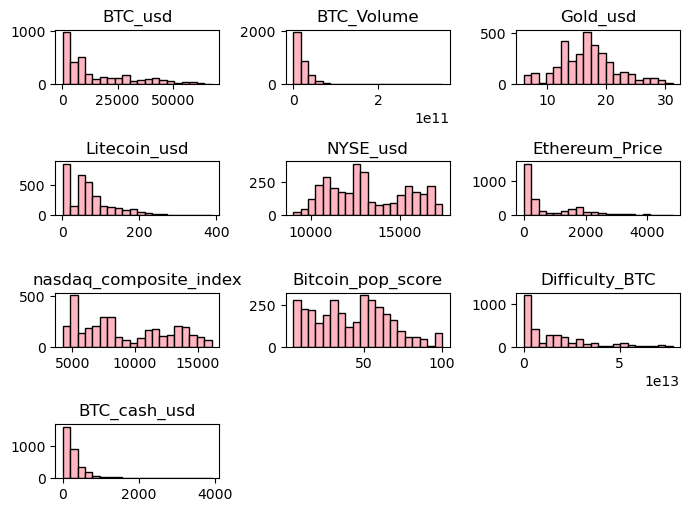

In [10]:
df_crypto.hist(bins=20, figsize=(7, 5.5), color='lightpink', edgecolor='black', grid=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [12]:
fig = px.line(df_crypto, x='Date', y='BTC_usd',
              labels={'Date': 'Year', 'BTC_usd': 'Stock value'},
              title='Stock analysis chart of Bitcoin')
fig.update_layout(title_x=0.5)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [13]:
df = df_crypto.copy()

In [14]:
df_crypto_mod = df_crypto.copy()

In [15]:
lag_steps = 3
for i in range(1, lag_steps + 1):
    df_crypto_mod[f'Bitcoin_Price_Lag_{i}'] = df['BTC_usd'].shift(i)
for i in range(1, lag_steps + 1):
    df_crypto_mod[f'NYSE_usd_lag_{i}'] = df['NYSE_usd'].shift(i)
for i in range(1, lag_steps + 1):
    df_crypto_mod[f'Litecoin_Price_Lag_{i}'] = df['Litecoin_usd'].shift(i)
for i in range(1, lag_steps + 1):
    df_crypto_mod[f'Difficulty_BTC_Lag_{i}'] = df['Difficulty_BTC'].shift(i)
for i in range(1, lag_steps + 1):
    df_crypto_mod[f'nasdaq_index_Lag_{i}'] = df['nasdaq_composite_index'].shift(i)
for i in range(1, lag_steps + 1):
    df_crypto_mod[f'etherium_price_Lag_{i}'] = df['Ethereum_Price'].shift(i)
df_crypto_mod.dropna(inplace=True)

In [16]:
df_crypto_mod.columns

Index(['Date', 'BTC_usd', 'BTC_Volume', 'Gold_usd', 'Litecoin_usd', 'NYSE_usd',
       'Ethereum_Price', 'nasdaq_composite_index', 'Bitcoin_pop_score',
       'Difficulty_BTC', 'BTC_cash_usd', 'Bitcoin_Price_Lag_1',
       'Bitcoin_Price_Lag_2', 'Bitcoin_Price_Lag_3', 'NYSE_usd_lag_1',
       'NYSE_usd_lag_2', 'NYSE_usd_lag_3', 'Litecoin_Price_Lag_1',
       'Litecoin_Price_Lag_2', 'Litecoin_Price_Lag_3', 'Difficulty_BTC_Lag_1',
       'Difficulty_BTC_Lag_2', 'Difficulty_BTC_Lag_3', 'nasdaq_index_Lag_1',
       'nasdaq_index_Lag_2', 'nasdaq_index_Lag_3', 'etherium_price_Lag_1',
       'etherium_price_Lag_2', 'etherium_price_Lag_3'],
      dtype='object')

In [17]:
feature_columns = ['Litecoin_usd', 'NYSE_usd', 'Ethereum_Price', 'nasdaq_composite_index', 'Difficulty_BTC',
                   'Bitcoin_Price_Lag_1', 'Bitcoin_Price_Lag_2', 'Bitcoin_Price_Lag_3',
                   'NYSE_usd_lag_1', 'NYSE_usd_lag_2', 'NYSE_usd_lag_3',
                   'Litecoin_Price_Lag_1', 'Litecoin_Price_Lag_2', 'Litecoin_Price_Lag_3',
                   'Difficulty_BTC_Lag_1', 'Difficulty_BTC_Lag_2', 'Difficulty_BTC_Lag_3',
                   'nasdaq_index_Lag_1', 'nasdaq_index_Lag_2', 'nasdaq_index_Lag_3',
                   'etherium_price_Lag_1', 'etherium_price_Lag_2', 'etherium_price_Lag_3']

target_column = 'BTC_usd'

X = df_crypto_mod[feature_columns]
y = df_crypto_mod[target_column]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Squared Error: 241429.8625887119
Mean Absolute Error: 250.17035673170267
Root Mean Squared Error: 491.35512879048275
R-squared: 0.9991110799395724


In [19]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 322763.69856275513
Mean Absolute Error: 275.8218799524668
Root Mean Squared Error: 568.1229607776429


In [20]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)

Random Forest - Mean Squared Error: 508732.07152528287
Random Forest - Mean Absolute Error: 364.23724174024017
Random Forest - Root Mean Squared Error: 713.2545629193569


In [21]:
# Interpret the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(feature_columns, coefficients):
    print(f"{feature}: {coef}")

Intercept: 144.29670196478583
Coefficients:
Litecoin_usd: 15212.104150685158
NYSE_usd: 2818.891026586896
Ethereum_Price: 25760.81837869055
nasdaq_composite_index: 2480.2443630340986
Difficulty_BTC: -885.2396916312337
Bitcoin_Price_Lag_1: 44666.476562335505
Bitcoin_Price_Lag_2: 15443.581216555687
Bitcoin_Price_Lag_3: 7012.9269248755745
NYSE_usd_lag_1: -1942.2404181979446
NYSE_usd_lag_2: -462.2982393650183
NYSE_usd_lag_3: -486.3036888830527
Litecoin_Price_Lag_1: -10469.493097366554
Litecoin_Price_Lag_2: -3871.815870450923
Litecoin_Price_Lag_3: -1028.4000440024918
Difficulty_BTC_Lag_1: -694.3843341933963
Difficulty_BTC_Lag_2: 750.1635863373665
Difficulty_BTC_Lag_3: 868.6885055099519
nasdaq_index_Lag_1: -1303.1023684201673
nasdaq_index_Lag_2: -1096.7573953133467
nasdaq_index_Lag_3: 443.7656952039616
etherium_price_Lag_1: -13330.018432474097
etherium_price_Lag_2: -8412.109715133494
etherium_price_Lag_3: -4326.381549770254


In [22]:
#starting and end date
sd=df.iloc[0][0]
ed=df.iloc[-1][0]
print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2015-01-04
Ending Date 2024-02-15


2015-2024

In [23]:
y_overall = df.loc[(df['Date'] >= '2015-01-01')
                     & (df['Date'] < '2024-02-16')]
y_overall.drop(y_overall[['BTC_usd','BTC_Volume','Gold_usd','Bitcoin_pop_score','BTC_cash_usd']],axis=1)

,Date,Litecoin_usd,NYSE_usd,Ethereum_Price,nasdaq_composite_index,Difficulty_BTC
0,2015-01-04,2.110220,10859.79981,0.000000,4760.240234,4.064096e+10
1,2015-01-05,1.958030,10764.37012,0.000000,4700.339844,4.064096e+10
2,2015-01-06,2.084340,10610.78027,0.000000,4666.850098,4.064096e+10
3,2015-01-07,2.118100,10514.48047,0.000000,4626.839844,4.064096e+10
4,2015-01-08,2.115610,10686.00000,0.000000,4689.540039,4.064096e+10
...,...,...,...,...,...,...
3325,2024-02-11,70.801582,17252.32031,2501.129883,15842.379880,7.550000e+13
3326,2024-02-12,71.544945,17275.86914,2507.578857,15980.620120,7.550000e+13
3327,2024-02-13,72.930977,17332.46094,2659.586182,15598.879880,7.550000e+13
3328,2024-02-14,68.999779,17068.53906,2641.685303,15781.709960,7.550000e+13


In [24]:
y_overall['Date'] = pd.to_datetime(y_overall['Date'])
monthvise = y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Litecoin_usd', 'NYSE_usd','Ethereum_Price', 'nasdaq_composite_index','Difficulty_BTC']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)

In [25]:
monthvise

,Litecoin_usd,NYSE_usd,Ethereum_Price,nasdaq_composite_index,Difficulty_BTC
Date,,,,,
January,74.896244,13498.287673,958.361887,9248.601682,1.778832e+13
February,77.846314,13370.891199,911.532999,9088.193625,1.604418e+13
March,74.993692,12814.969100,804.405625,8511.699653,1.327131e+13
April,79.954716,13011.623449,911.606939,8729.567654,1.395304e+13
May,81.948387,12962.528132,937.727552,8671.288025,1.440807e+13
June,68.400906,13090.820953,770.978165,8932.981026,1.447536e+13
July,62.979730,13198.237141,729.696768,9220.117863,1.415643e+13
August,62.224027,13306.654878,863.626204,9399.441443,1.462856e+13
September,59.694711,13173.940510,839.629180,9318.922358,1.592907e+13


line chart for all features

In [27]:
# Stock analysis chart of Litecoin
fig = px.line(y_overall, x='Date', y='Litecoin_usd',
              labels={'Date': 'Year', 'Litecoin_usd': 'Stock value'},
              title='Stock analysis chart of Litecoin')
fig.update_layout(title_x=0.5)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [28]:
#Stock analysis chart of NYSE
fig = px.line(y_overall, x='Date', y='NYSE_usd',
              labels={'Date': 'Year', 'NYSE_usd': 'Stock value'},
              title='Stock analysis chart of NYSE')
fig.update_layout(title_x=0.5)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [29]:
#Stock analysis chart of Ethereum
fig = px.line(y_overall, x='Date', y='Ethereum_Price',
              labels={'Date': 'Year', 'Ethereum_Price': 'Stock value'},
              title='Stock analysis chart of Ethereum')
fig.update_layout(title_x=0.5)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [30]:
#Stock analysis chart of NASDAQ Composite Index
fig = px.line(y_overall, x='Date', y='nasdaq_composite_index',
              labels={'Date': 'Year', 'nasdaq_composite_index': 'Stock value'},
              title='Stock analysis chart of NASDAQ Composite Index')
fig.update_layout(title_x=0.5)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [31]:
#Stock analysis chart of Difficulty BTC
fig = px.line(y_overall, x='Date', y='Difficulty_BTC',
              labels={'Date': 'Year', 'Difficulty_BTC': 'Stock value'},
              title='Stock analysis chart of Difficulty BTC')
fig.update_layout(title_x=0.5)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Building LSTM Model

In [32]:
df_New = df_crypto.copy()

In [33]:
data = df_New.filter(['BTC_usd'])
dataset = data.values

training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2664

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00154734],
       [0.00130894],
       [0.00145035],
       ...,
       [0.73864282],
       [0.73555679],
       [0.7667762 ]])

In [35]:
train_data = scaled_data[:training_data_len]
X_train = [train_data[i-60:i, 0] for i in range(60, len(train_data))]
y_train = [train_data[i, 0] for i in range(60, len(train_data))]

print(X_train[:1])
print(y_train[:1])


[array([0.00154734, 0.00130894, 0.00145035, 0.00162053, 0.00174014,
       0.00156571, 0.00163873, 0.0014503 , 0.0013247 , 0.00134323,
       0.00069757, 0.        , 0.00047754, 0.00045919, 0.00034365,
       0.00051317, 0.00053449, 0.00051179, 0.00074845, 0.0008404 ,
       0.00082827, 0.00104575, 0.0011456 , 0.00142891, 0.00128322,
       0.00083789, 0.00082934, 0.00073537, 0.00059327, 0.00073611,
       0.00089883, 0.00075125, 0.00075354, 0.0005941 , 0.00067885,
       0.00075395, 0.00069007, 0.00064395, 0.00063579, 0.00062801,
       0.00066899, 0.00087025, 0.00119648, 0.00085981, 0.00083899,
       0.00099273, 0.00088334, 0.00094035, 0.00099231, 0.00100407,
       0.00087718, 0.00092175, 0.00092015, 0.0008971 , 0.00088372,
       0.0011373 , 0.00114862, 0.00123878, 0.0014568 , 0.00155987])]
[0.0014225615950192848]


In [36]:
len(X_train)

2604

In [37]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [38]:
X_train.shape

(2604, 60)

In [39]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape

(2604, 60, 1)

In [40]:
test_data = scaled_data[training_data_len - 60:, :]
X_test = [test_data[i-60:i, 0] for i in range(60, len(test_data))]
y_test = dataset[training_data_len:, :]

print(X_test[:1])

[array([0.59283839, 0.56768151, 0.54757784, 0.56563425, 0.5506918 ,
       0.5663536 , 0.57940539, 0.57770763, 0.55703611, 0.63850075,
       0.65576458, 0.64934624, 0.62757107, 0.57844606, 0.5822421 ,
       0.56777196, 0.562289  , 0.57242534, 0.62038612, 0.58277302,
       0.57319195, 0.57453168, 0.55911879, 0.58610197, 0.58122345,
       0.60801873, 0.60510948, 0.617723  , 0.62361199, 0.60958151,
       0.60702814, 0.62617939, 0.63393137, 0.64993032, 0.65564943,
       0.65795742, 0.69234066, 0.69647565, 0.70176652, 0.69590733,
       0.67352466, 0.68437971, 0.67805118, 0.68675119, 0.68941153,
       0.67337907, 0.63869364, 0.6431114 , 0.62495781, 0.63236453,
       0.62375497, 0.58416447, 0.59291956, 0.6083063 , 0.590186  ,
       0.59928335, 0.59728641, 0.58694732, 0.60337787, 0.61337552])]


In [41]:
X_test = np.array(X_test)

In [42]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Model 1

In [43]:
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

# Compile model_1
model_1.compile(optimizer='Adam', loss='mse')

# Fit model_1
history_1 = model_1.fit(X_train, y_train, batch_size=1, epochs=8)



Epoch 1/8

2604/2604 [==============================] - 49s 17ms/step - loss: 0.0018
Epoch 2/8
2604/2604 [==============================] - 45s 17ms/step - loss: 9.4701e-04
Epoch 3/8
2604/2604 [==============================] - 44s 17ms/step - loss: 5.1958e-04
Epoch 4/8
2604/2604 [==============================] - 44s 17ms/step - loss: 5.0205e-04
Epoch 5/8
2604/2604 [==============================] - 44s 17ms/step - loss: 4.1346e-04
Epoch 6/8
2604/2604 [==============================] - 44s 17ms/step - loss: 3.9402e-04
Epoch 7/8
2604/2604 [==============================] - 44s 17ms/step - loss: 3.4786e-04
Epoch 8/8
2604/2604 [==============================] - 44s 17ms/step - loss: 5.0629e-04


In [44]:
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

21/21 [==============================] - 1s 11ms/step


666

In [45]:
# Get the root mean squared error (RMSE) for model_1
rmse_1 = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse_1

369.18630586993226

Model 2

In [46]:
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=9)

Epoch 1/9
2604/2604 [==============================] - 47s 17ms/step - loss: 0.0015
Epoch 2/9
2604/2604 [==============================] - 43s 17ms/step - loss: 8.6916e-04
Epoch 3/9
2604/2604 [==============================] - 44s 17ms/step - loss: 4.8282e-04
Epoch 4/9
2604/2604 [==============================] - 44s 17ms/step - loss: 4.9877e-04
Epoch 5/9
2604/2604 [==============================] - 44s 17ms/step - loss: 4.0218e-04
Epoch 6/9
2604/2604 [==============================] - 44s 17ms/step - loss: 3.9688e-04
Epoch 7/9
2604/2604 [==============================] - 44s 17ms/step - loss: 3.4697e-04
Epoch 8/9
2604/2604 [==============================] - 44s 17ms/step - loss: 5.0076e-04
Epoch 9/9
2604/2604 [==============================] - 45s 17ms/step - loss: 2.9527e-04


In [47]:
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

21/21 [==============================] - 1s 11ms/step


666

In [48]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

229.41613237612594

In [49]:
# Comparison Model 1 prediction and actual price
pred_acts = pd.DataFrame(data={'Predictions':predictions_1.flatten(), 'Actuals':y_test.flatten()})
pred_acts

,Predictions,Actuals
0,41919.695312,41371.51563
1,41769.269531,40525.86328
2,40936.761719,39738.72266
3,40215.355469,39478.37500
4,39986.867188,39472.60547
...,...,...
661,47642.042969,47768.96875
662,48079.406250,48296.38672
663,48696.375000,49941.35938
664,50422.996094,49733.44531


In [51]:
## Comparison Model 2 prediction and actual price
pred_act = pd.DataFrame(data={'Predictions':predictions_2.flatten(), 'Actuals':y_test.flatten()})
pred_act

,Predictions,Actuals
0,41308.679688,41371.51563
1,41232.121094,40525.86328
2,40469.277344,39738.72266
3,39716.890625,39478.37500
4,39426.316406,39472.60547
...,...,...
661,46687.656250,47768.96875
662,47309.734375,48296.38672
663,47843.035156,49941.35938
664,49375.921875,49733.44531


Now let's see what did our models with predictions and compare our 2 models together:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10488\1689892294.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10488\1689892294.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



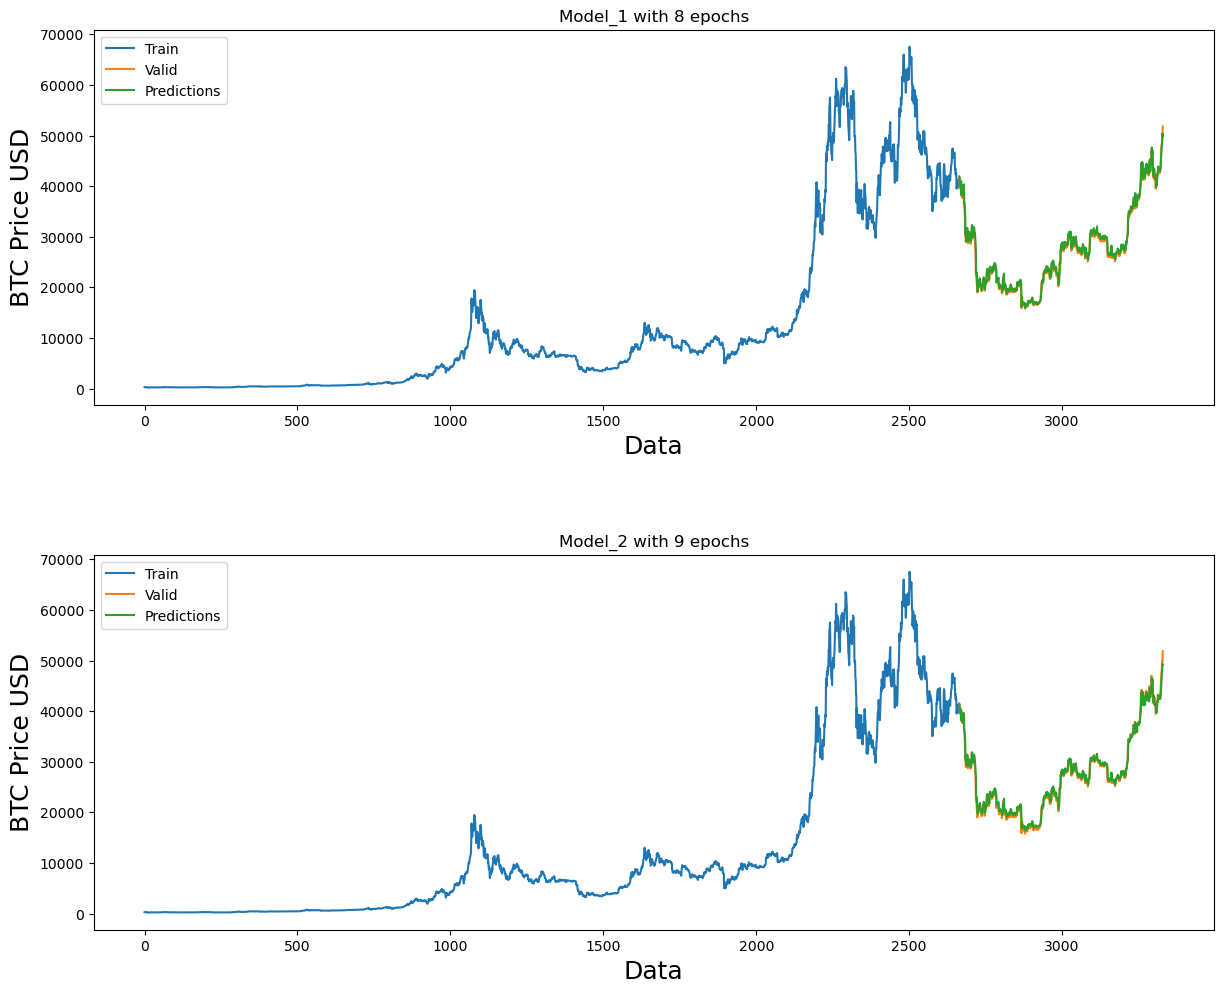

In [52]:
train = data[:training_data_len]

valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1

valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2

#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 8 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('BTC Price USD', fontsize=18)
plt.plot(train['BTC_usd'])
plt.plot(valid_1[['BTC_usd', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 9 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('BTC Price USD', fontsize=18)
plt.plot(train['BTC_usd'])
plt.plot(valid_2[['BTC_usd', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

It seem's our model_1 has a better predictions than the model_2.

Now it's time to predict a future day price which is not in train or test set. In other words we want to predict a price out of the dataframe which is the price of 5 days (starting 16-02-2024).

So first we need to create a new variable last_60_days and use it to predict the 5 days (starting 16-02-2024) price of Bitcoin. This way we can create a new test set to creating the price of last 60 days from today (today is 15-02-2024).

In [53]:
# MODEL 1 PREDICTION FOR NEXT 30 DAYS
next_30_days_predictions = []
last_60_days = scaled_data[-60:].reshape(1, -1, 1)

for _ in range(30):
    next_day_prediction = model_1.predict(last_60_days)
    next_30_days_predictions.append(next_day_prediction[0, 0])
    last_60_days = np.roll(last_60_days, -1, axis=1)
    last_60_days[0, -1, 0] = next_day_prediction[0, 0]

next_30_days_predictions = scaler.inverse_transform(np.array(next_30_days_predictions).reshape(-1, 1))
next_30_days_df = pd.DataFrame({'Day': range(1, 31), 'Predicted_BTC_usd': next_30_days_predictions.flatten()})
next_30_days_df

1/1 [==============================] - 0s 27ms/step


,Day,Predicted_BTC_usd
0,1,52367.582031
1,2,52527.523438
2,3,52760.804688
3,4,52990.667969
4,5,53189.558594
5,6,53354.808594
6,7,53490.925781
7,8,53603.308594
8,9,53696.667969
9,10,53774.843750


In [54]:
# MODEL 2 PREDICTION FOR NEXT 30 DAYS
next_30_days_predictions = []

last_60_days = scaled_data[-60:].reshape(1, -1, 1)

for _ in range(30):
    next_day_prediction = model_2.predict(last_60_days)
    next_30_days_predictions.append(next_day_prediction[0, 0])
    last_60_days = np.roll(last_60_days, -1, axis=1)
    last_60_days[0, -1, 0] = next_day_prediction[0, 0]
next_30_days_predictions = scaler.inverse_transform(np.array(next_30_days_predictions).reshape(-1, 1))
next_30_days_df = pd.DataFrame({'Day': range(1, 31), 'Predicted_BTC_usd': next_30_days_predictions.flatten()})
next_30_days_df

1/1 [==============================] - 0s 24ms/step


,Day,Predicted_BTC_usd
0,1,51169.097656
1,2,50547.332031
2,3,49998.343750
3,4,49453.921875
4,5,48921.105469
5,6,48407.980469
6,7,47920.476562
7,8,47461.785156
8,9,47032.750000
9,10,46632.527344
